In [1]:
import pandas as pd
import re

In [2]:
MedicareData = pd.read_csv("Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_CY2012.csv", thousands=',' , low_memory = False)

In [3]:
MedicareData

,National Provider Identifier,Last Name/Organization Name,First Name,Middle Initial,Credentials,Gender,Entity Code,Street Address 1,Street Address 2,City,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Medicare Beneficiary/Day Services,Average Medicare Allowed Amount,Standard Deviation of Medicare Allowed Amount,Average Submitted Charge Amount,Standard Deviation of Submitted Charge Amount,Average Medicare Payment Amount,Standard Deviation of Medicare Payment Amount
0,1184612244,BRAHNEY,JODY,S,MD,M,I,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,...,N,153.0,78,80,57.020000,0.000000,152.700719,4.031577,44.613268,5.078601
1,1699720995,GRENZ,DONALD,H,MD,M,I,401 N 9TH ST,NaN,BISMARCK,...,N,85.0,75,85,11.470000,0.000000,36.000000,0.000000,11.392000,0.714882
2,1871566638,INDES,JODI,E,M.D.,F,I,5 DURHAM RD,"BUILDING 3, SUITE C1",GUILFORD,...,N,16.0,16,16,178.150000,0.000000,298.125000,87.640512,178.150000,0.000000
3,1972581403,SALAMA,SHERIF,A,MD,M,I,850 BRAINARD RD,NaN,HIGHLAND HTS,...,N,33.0,25,33,206.696061,34.445926,1093.939394,340.622775,143.307273,52.987734
4,1679543235,AHARON,RAPHAEL,NaN,MD,M,I,10837 71ST AVE,NaN,FOREST HILLS,...,N,13.0,12,13,407.861538,68.891400,437.055385,137.325963,317.124615,65.860982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153267,1992787089,LARTCHENKO,SERGE,NaN,MD,M,I,5909 KING WILLIAM CT,NaN,PLANO,...,N,181.0,89,155,98.667459,1.663270,205.000000,0.000000,76.057017,14.411601
9153268,1083797799,SCHNELL,KENT,D,MD,M,I,4102 WOODLAWN AVE,SUITE 150,PASADENA,...,N,483.0,114,483,69.741594,0.344538,91.165631,2.568623,55.586253,3.145676
9153269,1619065687,KLEIN,MICHAEL,NaN,MD,M,I,362 N BEDFORD ST,NaN,EAST BRIDGEWATER,...,N,127.0,89,127,72.439291,0.271195,185.000000,0.000000,54.445197,12.670631
9153270,1417950635,MARINO,CHRIS,J,M.D.,M,I,12670 WHITEHALL DR,NaN,FORT MYERS,...,N,27.0,26,26,330.646296,78.154273,398.333333,91.293179,264.520741,62.524456


In [4]:
liieData = pd.read_csv("UPDATED.csv", low_memory= False)
len(set(liieData["NPI"]))

5570

In [5]:
list(MedicareData)

['National Provider Identifier',
 'Last Name/Organization Name',
 'First Name',
 'Middle Initial',
 'Credentials',
 'Gender',
 'Entity Code',
 'Street Address 1',
 'Street Address 2',
 'City',
 'Zip Code',
 'State Code',
 'Country Code',
 'Provider Type',
 'Medicare Participation',
 'Place of Service',
 'HCPCS Code',
 'HCPCS Description',
 'HCPCS Drug Indicator',
 'Number of Services',
 'Number of Medicare Beneficiaries',
 'Number of Medicare Beneficiary/Day Services',
 'Average Medicare Allowed Amount',
 'Standard Deviation of Medicare Allowed Amount',
 'Average Submitted Charge Amount',
 'Standard Deviation of Submitted Charge Amount',
 'Average Medicare Payment Amount',
 'Standard Deviation of Medicare Payment Amount']

In [6]:
list_of_standard_features= []
for  var in list(MedicareData):
    if re.search("Standard", var):
        list_of_standard_features.append(var)
        
    

In [7]:
Medicare_Participation =MedicareData [MedicareData['Medicare Participation'] == "Y"].reset_index()



In [8]:
Medicare_Participation_Drug = Medicare_Participation[Medicare_Participation['HCPCS Drug Indicator'] == "N"]

In [9]:
features = ['National Provider Identifier','Provider Type',  'Gender', 'Number of Services' ,'Number of Medicare Beneficiary/Day Services', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount'] 

In [10]:
Medicare_limited_features = Medicare_Participation[features]
Medicare_limited_features

,National Provider Identifier,Provider Type,Gender,Number of Services,Number of Medicare Beneficiary/Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount
0,1184612244,Pathology,M,153.0,80,152.700719,44.613268
1,1699720995,Internal Medicine,M,85.0,85,36.000000,11.392000
2,1871566638,Internal Medicine,F,16.0,16,298.125000,178.150000
3,1972581403,Interventional Pain Management,M,33.0,33,1093.939394,143.307273
4,1679543235,Ophthalmology,M,13.0,13,437.055385,317.124615
...,...,...,...,...,...,...,...
9148799,1992787089,Infectious Disease,M,181.0,155,205.000000,76.057017
9148800,1083797799,Internal Medicine,M,483.0,483,91.165631,55.586253
9148801,1619065687,Family Practice,M,127.0,127,185.000000,54.445197
9148802,1417950635,Neurology,M,27.0,26,398.333333,264.520741


In [11]:
list(liieData)

['LASTNAME',
 'FIRSTNAME',
 'MIDNAME',
 'BUSNAME',
 'GENERAL',
 'SPECIALTY',
 'UPIN',
 'NPI',
 'DOB',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'EXCLTYPE',
 'EXCLDATE',
 'REINDATE',
 'WAIVERDATE',
 'WVRSTATE']

In [12]:
grouping=['National Provider Identifier', "Provider Type", "Gender"]

In [13]:
#Medicare_limited_features.set_index(grouping)
grouping_frames = Medicare_limited_features.groupby(grouping)

In [14]:
numeric = [  'Average Medicare Payment Amount']

In [15]:
numeric =[ 'Number of Services', 'Number of Medicare Beneficiary/Day Services', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount']

In [16]:
grouping_frames_sum = grouping_frames.agg('sum')

In [17]:
grouping_frames_sum.reset_index(inplace=True)

In [18]:
columns = {"Number of Services": "NOS_SUM", 'Number of Medicare Beneficiary/Day Services': 'NMB/D_SUM', 'Average Submitted Charge Amount': 'ASCA_SUM', 'Average Medicare Payment Amount' : 'MPA_SUM'    }

In [19]:
grouping_frames_sum[numeric]

,Number of Services,Number of Medicare Beneficiary/Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount
0,1224.0,1224,1060.000000,575.530877
1,7673.0,5276,1065.000000,208.426446
2,52.0,52,327.571429,177.860000
3,834.0,631,274.965652,121.576654
4,2471.0,2470,2343.821257,1239.504432
...,...,...,...,...
824091,7552.0,7550,4380.060146,2714.539707
824092,1070.0,1070,55.000000,26.149346
824093,620.0,620,887.851852,411.650273
824094,792.0,792,2824.000000,878.399179


In [20]:
first_frame = grouping_frames_sum.rename(columns = columns)

In [21]:
import numpy as np
grouping_frames_std = grouping_frames.agg(np.std, ddof=0)


In [22]:
grouping_frames_std

,,,Number of Services,Number of Medicare Beneficiary/Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount
National Provider Identifier,Provider Type,Gender,,,,
1003000126,Internal Medicine,M,154.567071,154.567071,70.591090,38.831275
1003000134,Pathology,M,1942.431752,1422.428645,66.744733,17.619608
1003000142,Anesthesiology,M,2.000000,2.000000,52.785714,34.150000
1003000381,Physical Therapist,M,142.843131,74.300471,21.772203,17.832745
1003000407,Family Practice,M,174.563373,174.611667,103.874201,34.838875
...,...,...,...,...,...,...
1992999122,Internal Medicine,M,380.428064,380.289142,76.882855,56.365351
1992999452,Chiropractic,M,0.000000,0.000000,0.000000,0.000000
1992999551,Internal Medicine,F,38.562449,38.562449,43.354159,33.266553


In [23]:
grouping_frames_std.reset_index(inplace=True)

In [24]:
columns_ = {"Number of Services": "NOS_STD", 'Number of Medicare Beneficiary/Day Services': 'NMB/D_STD', 'Average Submitted Charge Amount': 'ASCA_STD', 'Average Medicare Payment Amount' : 'MPA_STD'    }

In [25]:
new_frame = grouping_frames_std[numeric].rename(columns = columns_)

In [26]:
ultimate_frame = first_frame.join(new_frame)

In [27]:
ultimate_frame

,National Provider Identifier,Provider Type,Gender,NOS_SUM,NMB/D_SUM,ASCA_SUM,MPA_SUM,NOS_STD,NMB/D_STD,ASCA_STD,MPA_STD
0,1003000126,Internal Medicine,M,1224.0,1224,1060.000000,575.530877,154.567071,154.567071,70.591090,38.831275
1,1003000134,Pathology,M,7673.0,5276,1065.000000,208.426446,1942.431752,1422.428645,66.744733,17.619608
2,1003000142,Anesthesiology,M,52.0,52,327.571429,177.860000,2.000000,2.000000,52.785714,34.150000
3,1003000381,Physical Therapist,M,834.0,631,274.965652,121.576654,142.843131,74.300471,21.772203,17.832745
4,1003000407,Family Practice,M,2471.0,2470,2343.821257,1239.504432,174.563373,174.611667,103.874201,34.838875
...,...,...,...,...,...,...,...,...,...,...,...
824091,1992999122,Internal Medicine,M,7552.0,7550,4380.060146,2714.539707,380.428064,380.289142,76.882855,56.365351
824092,1992999452,Chiropractic,M,1070.0,1070,55.000000,26.149346,0.000000,0.000000,0.000000,0.000000
824093,1992999551,Internal Medicine,F,620.0,620,887.851852,411.650273,38.562449,38.562449,43.354159,33.266553
824094,1992999825,Otolaryngology,M,792.0,792,2824.000000,878.399179,48.556805,48.556805,120.670660,36.966893


In [28]:
clean_liie = liieData[liieData["NPI"] != 0]
clean_liie

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
3,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
23,NaN,NaN,,"A & Y MEDICAL SUPPLY, INC",DME COMPANY,DME - GENERAL,NaN,1942476080,NaN,"6310 108TH STREET, APT 6J",FOREST HILLS,NY,11375,1128b8,20170518,0,0,NaN
27,NaN,NaN,,"A CARING ALTERNATIVE, INC",OTHER BUSINESS,HOME HEALTH AGENCY,NaN,1275600959,NaN,"1229 HURON RD E, FLR 6TH",CLEVELAND,OH,44115,1128a1,20130320,0,0,NaN
30,NaN,NaN,,"A FAIR DEAL PHARMACY, INC",OTHER BUSINESS,PHARMACY,NaN,1891731758,NaN,"C/O P O BOX 329014, #69709-05",BROOKLYN,NY,11232,1128b8,20170518,0,0,NaN
58,NaN,NaN,,"ACACIA MENTAL HEALTH CLINIC, L",OTHER BUSINESS,MENTAL/BEHAVIORAL HE,NaN,1851631543,NaN,5228 W FOND DU LAC AVENUE,MILWAUKEE,WI,53216,1128b7,20190326,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73946,ZUCKERMAN,DAVID,H,NaN,IND- LIC HC SERV PRO,PODIATRY,U10438,1124024435,19540411.0,1803 COUNTRY CLUB DR,CHERRY HILL,NJ,8003,1128b4,20120920,0,0,NaN
73953,ZUKOR,ALAN,J,NaN,DENTAL PRACTICE,DENTIST,T96408,1194930149,19500126.0,"9322 THIRD AVENUE, SUITE 204",BROOKLYN,NY,11209,1128b5,20090920,0,0,NaN
73963,ZUPKOFF,GERALD,,NaN,IND- LIC HC SERV PRO,DENTIST,NaN,1578637385,19301230.0,245 PEPPERIDGE ROAD,HEWLETT,NY,11557,1128a1,20120920,0,0,NaN
73968,ZURAWEK,TOMASZ,ADAM,NaN,"PHYSICIAN (MD, DO)",PULMONOLOGY,NaN,1558366815,19621215.0,"118 HIGHWAY 70 E, STE 2",DICKSON,TN,37055,1128a1,20160320,0,0,NaN


In [29]:
# for x in clean_liie["NPI"]:
#     print(x)

1922348218
1942476080
1275600959
1891731758
1851631543
1902198435
1073682936
1902166028
1992906937
1104947944
1164669479
1043302250
1780812768
1447560867
1790963460
1750442018
1073671517
1376533083
1285786608
1205019767
1346254653
1205992989
1922151851
1942399753
1235104571
1659424224
1629125307
1215968847
1215968847
1356713226
1649524182
1184831752
1700995859
1093800195
1487843231
1740277672
1275856452
1437418506
1154372779
1326100199
1548560683
1881816031
1831243807
1487873519
1750335329
1902997513
1730299652
1083747869
1396786695
1437449139
1366425233
1790746733
1770579518
1285651638
1861575805
1407923568
1598959389
1033407309
1679604375
1801024179
1285940148
1255601076
1710102033
1497971741
1700085289
1841464021
1629146865
1063710929
1184859761
1881879625
1205230711
1356339683
1558495325
1477704351
1083789143
1104927508
1124356043
1609993823
1851476832
1497077796
1679614671
1942347620
1295734671
1538506076
1023093473
1952382400
1154399970
1275549016
1053505115
1669658019
1063696508

1619181633
1366773244
1205940665
1700983038
1891931101
1144369083
1679919161
1013121920
1871577213
1841594595
1396961090
1578647038
1578647038
1659411494
1821006396
1992162390
1295731479
1295932143
1639299738
1295017945
1083784748
1821098054
1326093709
1275742454
1346286762
1053640896
1578617676
1508207325
1245231406
1356342026
1609933100
1407935919
1326071499
1184662561
1982897617
1427202050
1902188527
1669757530
1477794527
1306960521
1316997521
1578795597
1831440122
1376528182
1740488709
1902833981
1902868409
1992784698
1780842815
1578616447
1851473334
1376737809
1750692901
1164511960
1346385424
1003933839
1376643296
1831203975
1699748228
1942420039
1104044478
1285811711
1982865226
1801974613
1801821921
1548286685
1346468493
1710019955
1174693949
1609093814
1336484898
1982604344
1922266626
1053357376
1154748655
1487994836
1134472707
1003807629
1063568475
1912208000
1629204573
1124109780
1104008465
1700030293
1215151105
1427095363
1023083276
1174847115
1295767671
1164474797
1871716290

1689865917
1407071970
1235118373
1598913592
1750565362
1720161839
1932108701
1659382133
1366874091
1073717690
1386797348
1669418794
1275740706
1114068236
1184659849
1629025937
1417904491
1134391790
1548547870
1710927496
1306005061
1740673409
1811372899
1740209105
1972616761
1720025943
1215917042
1639380470
1407144017
1306113105
1184709073
1619973971
1023251873
1245285428
1750319604
1235438169
1386649507
1649287434
1649287434
1902216302
1013286178
1851451819
1659369320
1619056124
1871599530
1194774489
1295818052
1174782460
1659495216
1760480495
1730459983
1609979699
1407197528
1871559864
1316141971
1003885344
1104941137
1942670666
1467526855
1063547768
1790931566
1093877144
1962578922
1962441618
1659471035
1255463576
1245370006
1215134408
1497976096
1144511700
1679542781
1578826434
1881716348
1962534909
1700967874
1801117049
1467435487
1346273810
1326071564
1821115932
1780878637
1952541674
1427317734
1700152055
1982609723
1265867337
1225240641
1437328390
1952598906
1518176601
1770616278

1700109386
1477683852
1124064639
1043590466
1437470416
1689881799
1821022955
1720189087
1942377916
1689683831
1689683831
1780604264
1144405499
1275515496
1871568782
1871568782
1407990039
1407928583
1841346160
1578817128
1316962806
1962444075
1538156138
1689891798
1386736924
1679541098
1184797581
1518242205
1346338183
1538276803
1508127267
1568436244
1972670693
1407925076
1023134160
1174545271
1598844581
1033556048
1720177520
1962539619
1972824845
1245246925
1003904830
1205134236
1205963402
1477583797
1982619649
1982619649
1750324604
1780994699
1164467767
1316140726
1356496715
1356450274
1467447557
1578599346
1306153291
1306069034
1629264411
1952310112
1376576066
1851476535
1962556647
1245559483
1356673487
1972869196
1033267000
1750379830
1437138104
1417956715
1336469360
1861693848
1770665135
1104877869
1598704546
1821101825
1780667550
1386699528
1821043084
1447359443
1033311766
1225163728
1609992890
1104800333
1013136605
1841493582
1558385252
1558436329
1710925656
1528171774
1649206376

In [30]:
valid_npi = []
for x in clean_liie["NPI"].index:
    if ( int(str(clean_liie.at[ x, "EXCLDATE"])[0:4]) > 2012 ):
#         print(clean_liie.at[ x, "EXCLDATE"])
        valid_npi.append(clean_liie.at[ x, "NPI"])



20180419
20170518
20130320
20170518
20190326
20160120
20150409
20170518
20140720
20140820
20161020
20160720
20161216
20170620
20161216
20201020
20181120
20190620
20150319
20160115
20160115
20200520
20160420
20130919
20170920
20140421
20180118
20191219
20200720
20170220
20180620
20141120
20150820
20180719
20170720
20170620
20170620
20180817
20141120
20170920
20170320
20191219
20170420
20190620
20190820
20180320
20200520
20160120
20141020
20200120
20181016
20161020
20190620
20180220
20200812
20180808
20190418
20170530
20190520
20170530
20130120
20161020
20170530
20140918
20200520
20151028
20150306
20150306
20150306
20150306
20150306
20170106
20190925
20140120
20191101
20200520
20161213
20171120
20200920
20170823
20180118
20150618
20181201
20160518
20160518
20200618
20200820
20180820
20190718
20130520
20171019
20150727
20151105
20200618
20180920
20160620
20130120
20131020
20150306
20140220
20140220
20190220
20191117
20200618
20180320
20160120
20170201
20160519
20141020
20171120
20200820
2

20160620
20200205
20200520
20140820
20190620
20150820
20190220
20200420
20170320
20170720
20140720
20190418
20161020
20170620
20200520
20180419
20131020
20180118
20200220
20181018
20180118
20200820
20150618
20200720
20190620
20180719
20160420
20160519
20160420
20150920
20180920
20150820
20190718
20181220
20150219
20180419
20180719
20141120
20150420
20160120
20150820
20150720
20180920
20171120
20140320
20170720
20180520
20140918
20190919
20130220
20181018
20161220
20160519
20181120
20180520
20140120
20190919
20191120
20181018
20150618
20140420
20161220
20150219
20190418
20181220
20141120
20160218
20190220
20201119
20180920
20130919
20160104
20141218
20141020
20170720
20150520
20171019
20130418
20171220
20160120
20150219
20131120
20190620
20140520
20190820
20141020
20160519
20171019
20190620
20161020
20161120
20191120
20200319
20140720
20190320
20180920
20130820
20160720
20141120
20190320
20160818
20191219
20191219
20190620
20180620
20150720
20170518
20181120
20190320
20170119
20160519
2

20190718
20181220
20201020
20150319
20150920
20140720
20181120
20140720
20190820
20141020
20170119
20140520
20160320
20160120
20150618
20180620
20181001
20190520
20131120
20161216
20140420
20161220
20170320
20140313
20170820
20200319
20131219
20170920
20140520
20201119
20140918
20180820
20130418
20140520
20171120
20150618
20170620
20131120
20190620
20130628
20160218
20150219
20191120
20170518
20180419
20190620
20201020
20130919
20131219
20170720
20191219
20160519
20170320
20151020
20200820
20180920
20181018
20200820
20140720
20131120
20201020
20151020
20200520
20160120
20160120
20190120
20160320
20160519
20170820
20161020
20170720
20141020
20161020
20170320
20140420
20131020
20150720
20140820
20140420
20150219
20160218
20150920
20200520
20181018
20180419
20150618
20160320
20140420
20140420
20160218
20190418
20141020
20150319
20170518
20180520
20191120
20130520
20191219
20180118
20171220
20161020
20150520
20141120
20180220
20130919
20160218
20150618
20160120
20170320
20150520
20191120
2

20161220
20160720
20170920
20140220
20130520
20180320
20180914
20190620
20170119
20150420
20180520
20180419
20170119
20200120
20200820
20151119
20140520
20150618
20150219
20161220
20161020
20150219
20201119
20130418
20190320
20180118
20181220
20200618
20130120
20150219
20180719
20170119
20161020
20160519
20160218
20200618
20130418
20160120
20141218
20201119
20200319
20170119
20170119
20200520
20191120
20201119
20130220
20190120
20180920
20131219
20170720
20180220
20180118
20180520
20190520
20180620
20200618
20190418
20190418
20160818
20191219
20141020
20201020
20131120
20161220
20180620
20190919
20160218
20180419
20171220
20151220
20160218
20200618
20191031
20160320
20131002
20170518
20170220
20151220
20171019
20160208
20201119
20140520
20140420
20190919
20200820
20160928
20170920
20170119
20140520
20200720
20180118
20180220
20160519
20200720
20160218
20200220
20150319
20200920
20180118
20180820
20170620
20160218
20171120
20170320
20190620
20150820
20150219
20190220
20200520
20150219
2

In [32]:
set1 = ultimate_frame['National Provider Identifier'].tolist()
set2 = valid_npi

len(set(set1) & set(set2))

1349

In [33]:
indices = []
for x in ultimate_frame["National Provider Identifier"].index:
    if ( ultimate_frame.at[ x, "National Provider Identifier"] in valid_npi):
        ultimate_frame.at[x, "label"]= 1
        indices.append(x)
    else:
        ultimate_frame.at[x, "label"]= 0
        
        

In [34]:
ultimate_frame

,National Provider Identifier,Provider Type,Gender,NOS_SUM,NMB/D_SUM,ASCA_SUM,MPA_SUM,NOS_STD,NMB/D_STD,ASCA_STD,MPA_STD,label
0,1003000126,Internal Medicine,M,1224.0,1224,1060.000000,575.530877,154.567071,154.567071,70.591090,38.831275,0.0
1,1003000134,Pathology,M,7673.0,5276,1065.000000,208.426446,1942.431752,1422.428645,66.744733,17.619608,0.0
2,1003000142,Anesthesiology,M,52.0,52,327.571429,177.860000,2.000000,2.000000,52.785714,34.150000,0.0
3,1003000381,Physical Therapist,M,834.0,631,274.965652,121.576654,142.843131,74.300471,21.772203,17.832745,0.0
4,1003000407,Family Practice,M,2471.0,2470,2343.821257,1239.504432,174.563373,174.611667,103.874201,34.838875,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
824091,1992999122,Internal Medicine,M,7552.0,7550,4380.060146,2714.539707,380.428064,380.289142,76.882855,56.365351,0.0
824092,1992999452,Chiropractic,M,1070.0,1070,55.000000,26.149346,0.000000,0.000000,0.000000,0.000000,0.0
824093,1992999551,Internal Medicine,F,620.0,620,887.851852,411.650273,38.562449,38.562449,43.354159,33.266553,0.0
824094,1992999825,Otolaryngology,M,792.0,792,2824.000000,878.399179,48.556805,48.556805,120.670660,36.966893,0.0


In [35]:
index_dataframe = pd.DataFrame(data = {"index": indices})

In [36]:
index_dataframe.to_csv(path_or_buf= "npi_based_mapping")

In [37]:
len(set(ultimate_frame["Provider Type"]))

84

In [38]:
oneHotEncoded = pd.get_dummies(data = ultimate_frame, columns=['Provider Type', 'Gender'])

In [39]:
oneHotEncoded["label"]= oneHotEncoded["label"].astype(np.int64)
# xiv['Volume'] = xiv['Volume'].astype(np.float64)

In [40]:
oneHotEncoded

,National Provider Identifier,NOS_SUM,NMB/D_SUM,ASCA_SUM,MPA_SUM,NOS_STD,NMB/D_STD,ASCA_STD,MPA_STD,label,...,Provider Type_Speech Language Pathologist,Provider Type_Sports Medicine,Provider Type_Surgical Oncology,Provider Type_Thoracic Surgery,Provider Type_Unknown Physician Specialty Code,Provider Type_Unknown Supplier/Provider,Provider Type_Urology,Provider Type_Vascular Surgery,Gender_F,Gender_M
0,1003000126,1224.0,1224,1060.000000,575.530877,154.567071,154.567071,70.591090,38.831275,0,...,0,0,0,0,0,0,0,0,0,1
1,1003000134,7673.0,5276,1065.000000,208.426446,1942.431752,1422.428645,66.744733,17.619608,0,...,0,0,0,0,0,0,0,0,0,1
2,1003000142,52.0,52,327.571429,177.860000,2.000000,2.000000,52.785714,34.150000,0,...,0,0,0,0,0,0,0,0,0,1
3,1003000381,834.0,631,274.965652,121.576654,142.843131,74.300471,21.772203,17.832745,0,...,0,0,0,0,0,0,0,0,0,1
4,1003000407,2471.0,2470,2343.821257,1239.504432,174.563373,174.611667,103.874201,34.838875,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824091,1992999122,7552.0,7550,4380.060146,2714.539707,380.428064,380.289142,76.882855,56.365351,0,...,0,0,0,0,0,0,0,0,0,1
824092,1992999452,1070.0,1070,55.000000,26.149346,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
824093,1992999551,620.0,620,887.851852,411.650273,38.562449,38.562449,43.354159,33.266553,0,...,0,0,0,0,0,0,0,0,1,0
824094,1992999825,792.0,792,2824.000000,878.399179,48.556805,48.556805,120.670660,36.966893,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
new_encoded = oneHotEncoded.groupby('label')

In [42]:
from sklearn.model_selection import train_test_split
train_df = pd.DataFrame()
test_df = pd.DataFrame()
for key,item in new_encoded:
    group = new_encoded.get_group(key)
    if len(group) >= 1/(1-0.8):
        train, test = train_test_split(group, train_size=0.8, random_state=42, shuffle= True)
        train_df= train_df.append(train)
        test_df = test_df.append(test)
            #print("adding to first train")

    

In [43]:
test_df

,National Provider Identifier,NOS_SUM,NMB/D_SUM,ASCA_SUM,MPA_SUM,NOS_STD,NMB/D_STD,ASCA_STD,MPA_STD,label,...,Provider Type_Speech Language Pathologist,Provider Type_Sports Medicine,Provider Type_Surgical Oncology,Provider Type_Thoracic Surgery,Provider Type_Unknown Physician Specialty Code,Provider Type_Unknown Supplier/Provider,Provider Type_Urology,Provider Type_Vascular Surgery,Gender_F,Gender_M
4116,1003855065,1035.0,1012,8121.383333,2415.504670,82.079494,79.398305,496.113082,143.304751,0,...,0,0,0,0,0,0,0,0,0,1
694068,1841248721,404.0,404,3509.958683,433.635661,63.854209,63.854209,390.217262,56.881125,0,...,0,0,0,0,0,0,0,0,1,0
209529,1255375671,4959.0,4958,2600.516130,981.844620,142.941592,142.955629,79.652766,32.660617,0,...,0,0,0,0,0,0,0,0,0,1
487453,1598712762,47.0,47,1608.520833,296.621542,0.471405,0.471405,282.235722,8.179718,0,...,0,0,0,0,0,0,0,0,0,1
261103,1316930951,4386.0,3865,11856.640108,2915.178765,197.142505,189.564450,511.089956,73.370587,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787012,1952395881,24339.0,6743,2063.640019,1148.230950,2095.981435,296.871089,73.628249,44.149241,1,...,0,0,0,0,0,0,0,0,0,1
255793,1316005036,279.0,279,1163.532500,443.237707,34.787354,34.787354,141.143483,62.470885,1,...,0,0,0,0,0,0,0,0,0,1
434778,1528171774,3578.0,3577,5728.097055,2834.689508,61.161551,61.133562,116.777246,56.352464,1,...,0,0,0,0,0,0,0,0,0,1
33904,1043220262,167.0,167,597.000000,277.312969,17.166464,17.166464,14.855555,22.535485,1,...,0,0,0,0,0,0,0,0,0,1


In [45]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
X = oneHotEncoded.iloc[:,1:9].join(oneHotEncoded.iloc[:,10:96])
y=  oneHotEncoded.loc[:, ["label"]]

X_train = train_df.iloc[:,1:9].join(train_df.iloc[:,10:96])
y_train=  train_df.loc[:, ["label"]]

X_test = test_df.iloc[:,1:9].join(test_df.iloc[:,10:96])
y_test=  test_df.loc[:, ["label"]]
# # sampling_strategy
# nearMiss = NearMiss(version=1, n_neighbors=3, sampling_strategy=0.25)
# X_new_25,y_new_25 = nearMiss.fit_resample(X, y)

In [46]:
def compute_instances(y):
    i =0
    for x in y["label"]:
        if x ==1:
            i+=1
    print("No instances from minority classes:", i)
    print("No instances from majority classes:", len(y)-i)
    print("ratio", i/ len(y), 'to', (len(y)-i)/len(y) )
    

In [160]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
def combined_sampling_approach(X, y,undervalue, overvalue):
   
    compute_instances(y) 
    oversample = SMOTE(sampling_strategy = overvalue)
    X_new, y_new = oversample.fit_resample(X, y)
    
    compute_instances(y_new)    
    nearMiss = NearMiss(version=1, n_neighbors = 3, sampling_strategy = undervalue)
    X_new, y_new = nearMiss.fit_resample(X_new, y_new)
    compute_instances(y_new)

    return (X_new, y_new)

In [48]:
# X_, y_ = combined_sampling_approach(X_train, y_train, 0.015, 0.03)

No instances from minority classes: 1079
No instances from majority classes: 658197
ratio 0.001636643833538609 to 0.9983633561664614
No instances from minority classes: 1079
No instances from majority classes: 71933
ratio 0.01477839259299841 to 0.9852216074070016
No instances from minority classes: 2157
No instances from majority classes: 71933
ratio 0.02911324065325955 to 0.9708867593467404


In [192]:
def regress(X, y):
    cv = KFold(n_splits=10, shuffle=True)
    regressor = LogisticRegression(random_state = 42)
    scores = cross_val_score(regressor, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    scores_ = cross_val_score(regressor, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    print('AUC for SVM is: %.3f (%.3f)' % (mean(scores), std(scores_)))
    print('Balanced accuracy SVM is: %.3f (%.3f)' % (mean(scores), std(scores_)))

In [187]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier


def train_with_multiple_models (X, y):

    
    cv = KFold(n_splits=10, shuffle=True)
    # create model
    model = RandomForestClassifier(max_depth=5, random_state=42)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    scores_ = cross_val_score(model, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('AUC for Random Forest is : %.3f (%.3f)' % (mean(scores), std(scores)))
    print('Balanced accuracy for AUC for Random Forest is: %.3f (%.3f)' % (mean(scores_), std(scores_)))
    
    clf = tree.DecisionTreeClassifier(max_depth=5, random_state = 42)

    
    scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    scores_ = cross_val_score(clf, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    print('AUC for decision trees is: %.3f (%.3f)' % (mean(scores), std(scores_)))
    print('Balanced accuracy for decision trees is: %.3f (%.3f)' % (mean(scores), std(scores_)))
    
    
    
    svm = LinearSVC(random_state=42)
    scores = cross_val_score(svm, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    scores_ = cross_val_score(svm, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    print('AUC for SVM is: %.3f (%.3f)' % (mean(scores), std(scores_)))
    print('Balanced accuracy SVM is: %.3f (%.3f)' % (mean(scores), std(scores_)))
    
    model_ = XGBClassifier(max_delta_step= 1, max_depth= 5, scale_pos_weight=0.8)
    scores = cross_val_score(model_, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    scores_ = cross_val_score(model_, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    print('AUC for XBoosted is: %.3f (%.3f)' % (mean(scores), std(scores_)))
    print('Balanced accuracy for  XBoosted trees is: %.3f (%.3f)' % (mean(scores), std(scores_)))
    

    
    
    
    
    
    

In [162]:
X_, y_ = combined_sampling_approach(X, y, 0.3, 0.2)

No instances from minority classes: 1349
No instances from majority classes: 822747
ratio 0.001636945210266765 to 0.9983630547897332
No instances from minority classes: 164549
No instances from majority classes: 822747
ratio 0.16666632904417722 to 0.8333336709558228
No instances from minority classes: 164549
No instances from majority classes: 548496
ratio 0.23076944652862022 to 0.7692305534713798


In [164]:
train_with_multiple_models( X_, y_)

AUC for Random Forest is : 0.897 (0.001)
Balanced accuracy for AUC for Random Forest is: 0.643 (0.001)
AUC for decision trees is: 0.859 (0.003)
Balanced accuracy for decision trees is: 0.859 (0.003)
AUC for SVM is: 0.847 (0.054)
Balanced accuracy SVM is: 0.847 (0.054)
AUC for XBoosted is: 0.984 (0.005)
Balanced accuracy for  XBoosted trees is: 0.984 (0.005)


In [170]:
X_1, y_1 = combined_sampling_approach(X, y, 0.47, 0.45)

No instances from minority classes: 1349
No instances from majority classes: 822747
ratio 0.001636945210266765 to 0.9983630547897332
No instances from minority classes: 370236
No instances from majority classes: 822747
ratio 0.3103447408722505 to 0.6896552591277495
No instances from minority classes: 370236
No instances from majority classes: 787736
ratio 0.319727938153945 to 0.680272061846055


In [172]:
train_with_multiple_models(X_1, y_1)

AUC for Random Forest is : 0.867 (0.001)
Balanced accuracy for AUC for Random Forest is: 0.575 (0.003)
AUC for decision trees is: 0.833 (0.001)
Balanced accuracy for decision trees is: 0.833 (0.001)
AUC for SVM is: 0.676 (0.012)
Balanced accuracy SVM is: 0.676 (0.012)
AUC for XBoosted is: 0.983 (0.001)
Balanced accuracy for  XBoosted trees is: 0.983 (0.001)


In [173]:
X_2, y_2 = combined_sampling_approach(X, y, 0.4, 0.2)

No instances from minority classes: 1349
No instances from majority classes: 822747
ratio 0.001636945210266765 to 0.9983630547897332
No instances from minority classes: 164549
No instances from majority classes: 822747
ratio 0.16666632904417722 to 0.8333336709558228
No instances from minority classes: 164549
No instances from majority classes: 411372
ratio 0.28571453376417943 to 0.7142854662358206


In [174]:
train_with_multiple_models(X_2, y_2)

AUC for Random Forest is : 0.909 (0.001)
Balanced accuracy for AUC for Random Forest is: 0.713 (0.001)
AUC for decision trees is: 0.896 (0.003)
Balanced accuracy for decision trees is: 0.896 (0.003)
AUC for SVM is: 0.705 (0.048)
Balanced accuracy SVM is: 0.705 (0.048)
AUC for XBoosted is: 0.986 (0.002)
Balanced accuracy for  XBoosted trees is: 0.986 (0.002)


In [175]:
X_3, y_3 = combined_sampling_approach(X, y, 0.25, 0.2)

No instances from minority classes: 1349
No instances from majority classes: 822747
ratio 0.001636945210266765 to 0.9983630547897332
No instances from minority classes: 164549
No instances from majority classes: 822747
ratio 0.16666632904417722 to 0.8333336709558228
No instances from minority classes: 164549
No instances from majority classes: 658196
ratio 0.2 to 0.8


In [176]:
train_with_multiple_models(X_3, y_3)

AUC for Random Forest is : 0.884 (0.002)
Balanced accuracy for AUC for Random Forest is: 0.588 (0.000)
AUC for decision trees is: 0.840 (0.000)
Balanced accuracy for decision trees is: 0.840 (0.000)
AUC for SVM is: 0.882 (0.043)
Balanced accuracy SVM is: 0.882 (0.043)
AUC for XBoosted is: 0.982 (0.002)
Balanced accuracy for  XBoosted trees is: 0.982 (0.002)


In [196]:
X_4, y_4 = combined_sampling_approach(X, y, 0.43, 0.42)

No instances from minority classes: 1349
No instances from majority classes: 822747
ratio 0.001636945210266765 to 0.9983630547897332
No instances from minority classes: 345553
No instances from majority classes: 822747
ratio 0.2957742018317213 to 0.7042257981682787
No instances from minority classes: 345553
No instances from majority classes: 803611
ratio 0.30069946500238437 to 0.6993005349976157


In [179]:
train_with_multiple_models(X_4, y_4)

AUC for Random Forest is : 0.861 (0.001)
Balanced accuracy for AUC for Random Forest is: 0.565 (0.001)
AUC for decision trees is: 0.832 (0.001)
Balanced accuracy for decision trees is: 0.832 (0.001)
AUC for SVM is: 0.859 (0.056)
Balanced accuracy SVM is: 0.859 (0.056)
AUC for XBoosted is: 0.983 (0.001)
Balanced accuracy for  XBoosted trees is: 0.983 (0.001)


In [185]:
X_4, y_4 = combined_sampling_approach(X, y, 0.5, 0.3)

No instances from minority classes: 1349
No instances from majority classes: 822747
ratio 0.001636945210266765 to 0.9983630547897332
No instances from minority classes: 246824
No instances from majority classes: 822747
ratio 0.23076915884966964 to 0.7692308411503304
No instances from minority classes: 246824
No instances from majority classes: 493648
ratio 0.3333333333333333 to 0.6666666666666666


In [188]:
train_with_multiple_models(X_4, y_4)

AUC for Random Forest is : 0.901 (0.002)
Balanced accuracy for AUC for Random Forest is: 0.699 (0.003)
AUC for decision trees is: 0.880 (0.002)
Balanced accuracy for decision trees is: 0.880 (0.002)
AUC for SVM is: 0.903 (0.102)
Balanced accuracy SVM is: 0.903 (0.102)
AUC for XBoosted is: 0.986 (0.002)
Balanced accuracy for  XBoosted trees is: 0.986 (0.002)


In [193]:
regress(X_, y_)

AUC for SVM is: 0.624 (0.017)
Balanced accuracy SVM is: 0.624 (0.017)


In [194]:
regress(X_1, y_1)

AUC for SVM is: 0.592 (0.015)
Balanced accuracy SVM is: 0.592 (0.015)


In [195]:
regress(X_2, y_2)

AUC for SVM is: 0.691 (0.018)
Balanced accuracy SVM is: 0.691 (0.018)


In [197]:
regress(X_4, y_4)

AUC for SVM is: 0.583 (0.008)
Balanced accuracy SVM is: 0.583 (0.008)


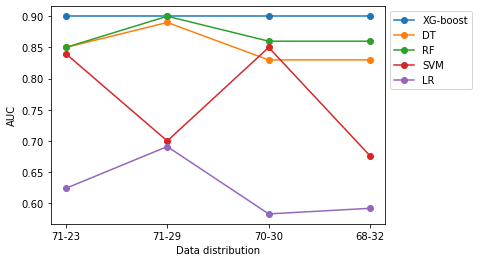

In [4]:
import matplotlib.pyplot as plt

Xg_boost = [0.9, 0.9, 0.9, 0.9]
Dt = [0.85, 0.89, 0.83, 0.83]
Rf = [0.85, 0.9, 0.86, 0.86]
Svm=[0.84, 0.7, 0.85, 0.676]
Lr = [0.624, 0.691, 0.583, 0.592] 
Xaxis = ['71-23', '71-29', '70-30', '68-32']

plt.xlabel('Data distribution')
plt.ylabel('AUC')
plt.plot( Xaxis, Xg_boost, 'o-', label="XG-boost")
plt.plot( Xaxis, Dt, 'o-', label = "DT")
plt.plot( Xaxis, Rf, 'o-', label = "RF")
plt.plot( Xaxis, Svm, 'o-', label = "SVM")
plt.plot( Xaxis, Lr, 'o-', label = 'LR')
#plt.legend()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.savefig("algo.png")